# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [485]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 +  \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{20mm} \text{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm}\text{(Set equal to 0 and solve for intercept)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\text{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in the suburbs of Boston. This dataset was originally taken from the StatLib library, which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 

The machine learning community has developed awareness about fairness issues in the past couple of years with popular benchmarking datasets. The Boston Housing data has been phased out of many libraries (including scikit-learn). While this dataset will be removed in a future version of this mini-project, we ask students working through this exercise to pay close attention to how systemic racism can occur in data and sometimes be hard to spot.

We recommend that all students read this [excellent article](https://fairlearn.org/main/user_guide/datasets/boston_housing_data.html), which walks through the origin of the dataset and its flaws 
while discussing with their mentor the techniques suggested to avoid the disastrous consequences that might occur if not aware of the inherent racial bias in this dataset.



## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [486]:
from sklearn.datasets import load_boston
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

boston = load_boston()

In [487]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [488]:
boston.data.shape

(506, 13)

In [489]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [490]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now let's explore the data set itself. 

In [491]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [492]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [493]:
print(boston.target.shape)

(506,)


In [494]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [495]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5, 1.0, 'Relationship between CRIM and Price')

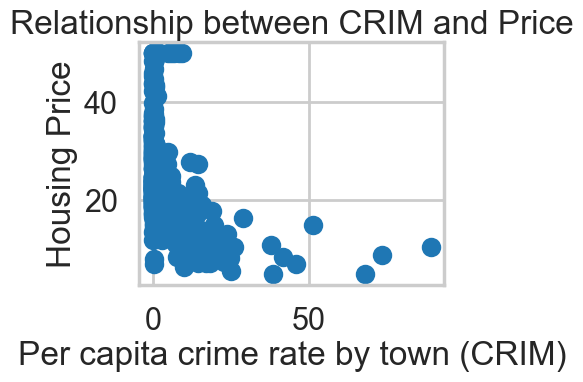

In [496]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>

<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>


</div>

Text(0.5, 1.0, 'Relationship between RM and Price')

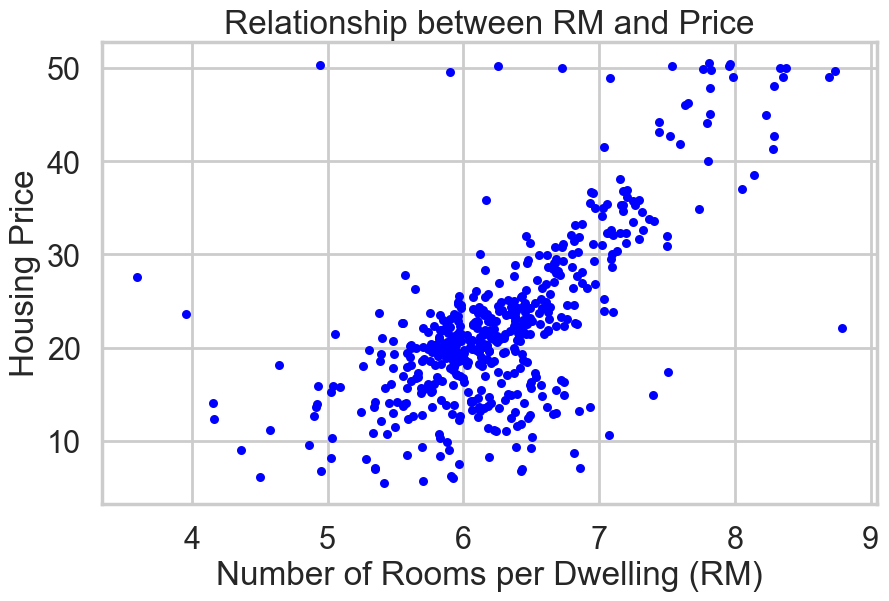

In [811]:
# your turn: scatter plot between *RM* (number of rooms) and *PRICE*

# jitter (from stackoverflow)
def rand_jitter(arr):
    stdev = .01 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev

def jitter(x, y, s=20, c='b', marker='o', cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, hold=None, **kwargs):
    return plt.scatter(rand_jitter(x), rand_jitter(y), s=s, c=c, marker=marker, cmap=cmap, norm=norm, vmin=vmin, vmax=vmax, alpha=alpha, linewidths=linewidths, **kwargs)

# scatter plot between *RM* (number of rooms) and *PRICE*
plt.figure(figsize=(10,6))
jitter(bos.RM, bos.PRICE)
plt.xlabel("Number of Rooms per Dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")
plt.grid(b=True, color='grey', alpha=0.3, linestyle='-.', linewidth=2)

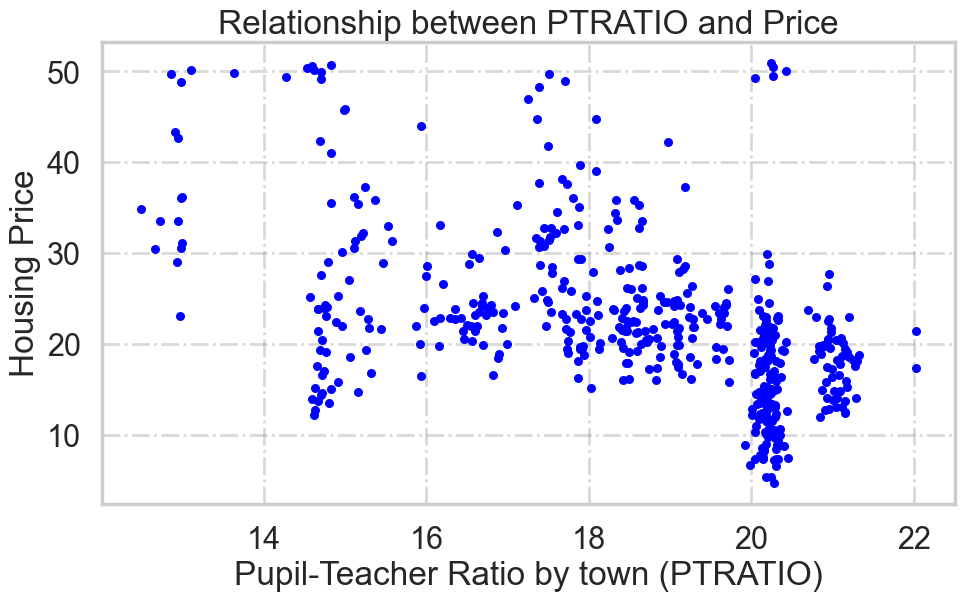

In [918]:
# your turn: scatter plot between *PTRATIO* (pupil-teacher ratio) and *PRICE*
plt.figure(figsize=(11,6))
jitter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-Teacher Ratio by town (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")
plt.grid(b=True, color='grey', alpha=0.3, linestyle='-.', linewidth=2)


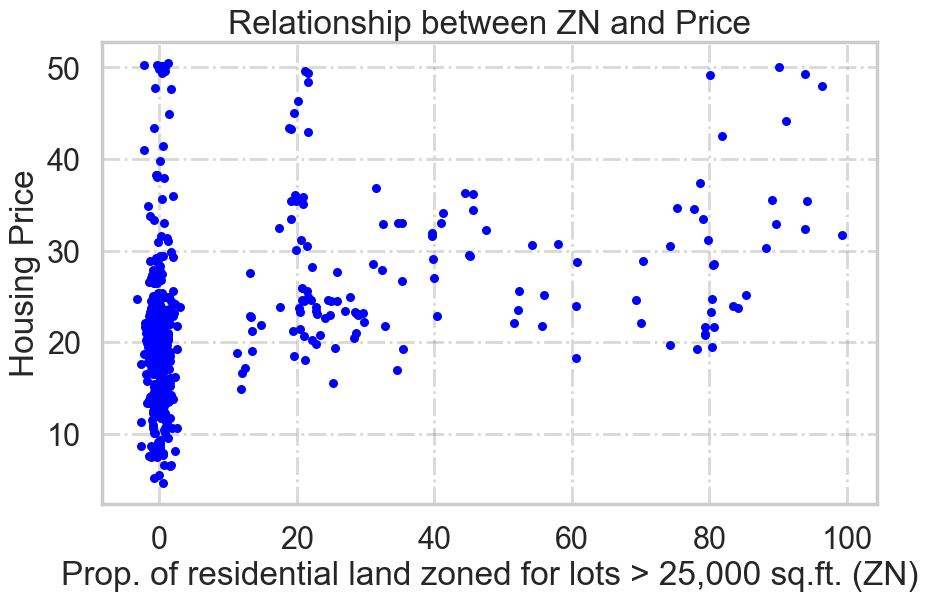

In [957]:
# your turn: create some other scatter plots
plt.figure(figsize=(10,6))
jitter(bos.ZN, bos.PRICE)
plt.xlabel("Prop. of residential land zoned for lots > 25,000 sq.ft. (ZN)")
plt.ylabel("Housing Price")
plt.title("Relationship between ZN and Price")
plt.grid(b=True, color='grey', alpha=0.3, linestyle='-.', linewidth=2)

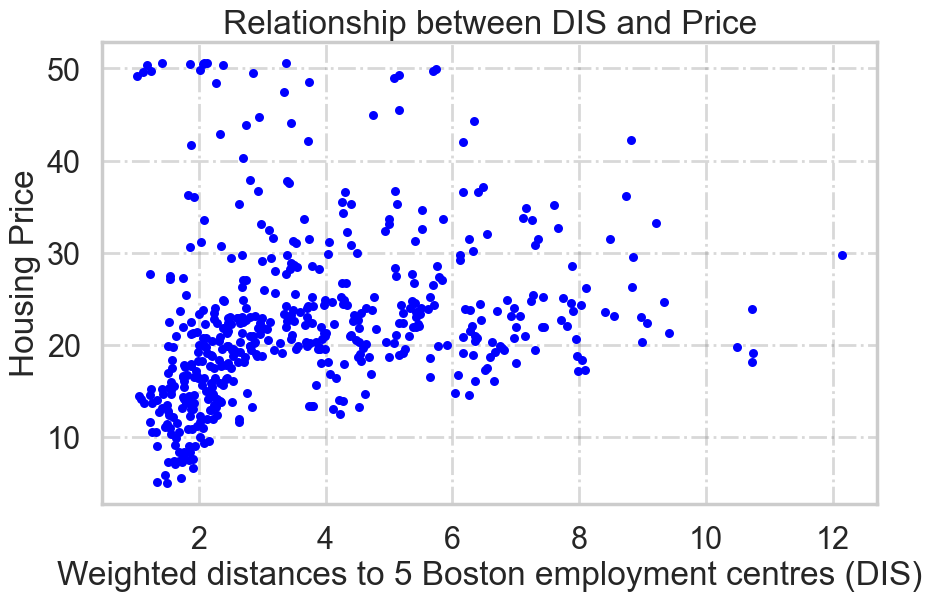

In [995]:
plt.figure(figsize=(10,6))
jitter(bos.DIS, bos.PRICE)
plt.xlabel("Weighted distances to 5 Boston employment centres (DIS)")
plt.ylabel("Housing Price")
plt.title("Relationship between DIS and Price")
plt.grid(b=True, color='grey', alpha=0.3, linestyle='-.', linewidth=2)


Response: 

To begin with, it's important to understand the level of the data. The data is aggregated, so 'Price' is corresponds to average house value in units of 100,000. This is why, for instance, we we look at the number of rooms per dwelling (RM) colum, it has decimal numbers: RM is the average number of rooms in units of 100,000. Thus, the scatterplots plot averages and the relationships among them.

It is problematic to draw conclusions about individual-level data (an individual dwelling) from aggregated data. This is known as ecological fallacy and while I won't explain it further, it is certaintly not how I would do a study of this type. All of the data here is aggregated and it is not even clear how it was decided to be aggregated (is it by county or number of blocks?). It is also confusing to consider the average number of rooms in dwellings without considering the square-footage of a dwelling. 

In the first figure we see that, as the average of number of rooms increases (RM), so does the average price for the dwelling. 

Although the relationship between (average) pupil-teacher (RTRATIO) and average dwelling price in Figure 2 is not very clear and seems not to be a strong relationship, most of the cases in which the PTRATIO is 20 students per teacher or higher are linked to dwellings with an average price which is among the lowest. In fact, the mean price is 22 and most of the dwellings for which PTRATIO is 20 or below have a (mean) price below 20. In terms of 

The third figure shows a scatterplot of the proportion of residential land zoned for over 25,000 squared feet (RN) against the average dwelling price. We see that when the proportion is not zero, there appears a slight positive relationship between RN and price. As the proportion increases from 25% to 100%, there appears to be a slight increase in price.

The final figure plots the weighted distance between the dwellings and 5 Boston employment centers (DIS) and the (average) price. Most data points are relatively close to the employment centers, with those having the lowest and highest prices, while the dwellings that are on average further from the employment centers have a price in the middle of the price distribution. 

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

<AxesSubplot:xlabel='RM', ylabel='PRICE'>

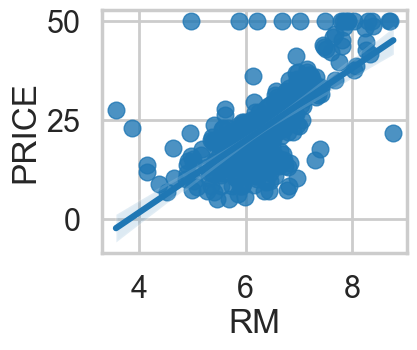

In [996]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms


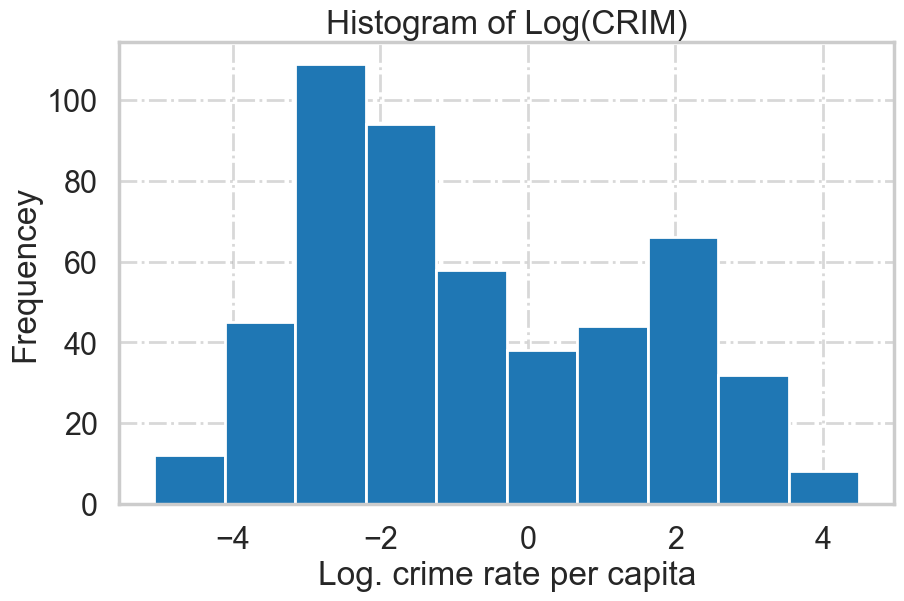

In [1067]:
plt.figure(figsize=(10,6))
plt.hist(np.log(bos.CRIM))
plt.title("Histogram of Log(CRIM)")
plt.xlabel("Log. crime rate per capita")
plt.ylabel("Frequencey")
plt.grid(b=True, color='grey', alpha=0.3, linestyle='-.', linewidth=2)
plt.show()

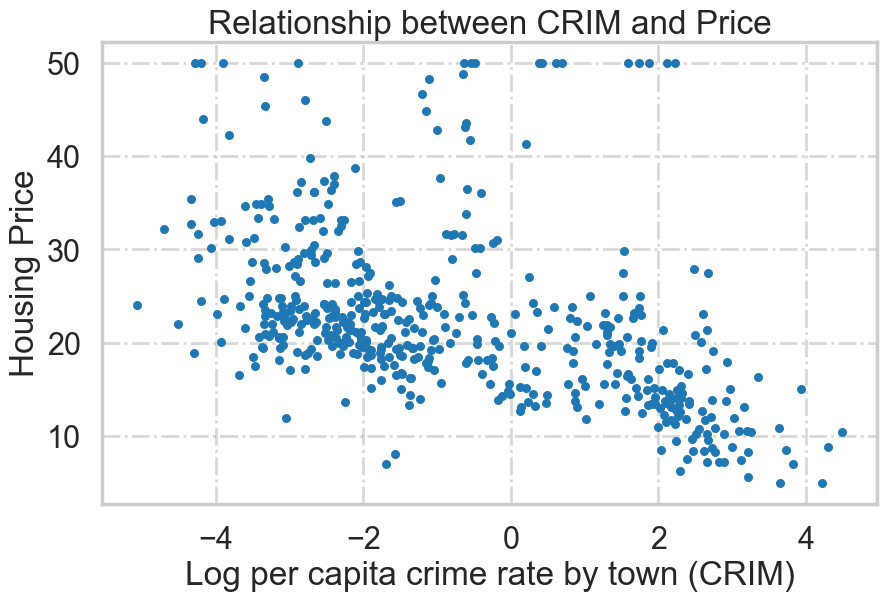

In [1135]:
plt.figure(figsize=(10,6))
plt.scatter(np.log(bos.CRIM), bos.PRICE, s =20)
plt.xlabel("Log per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")
plt.grid(b=True, color='grey', alpha=0.3, linestyle='-.', linewidth=2)

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?<p>

</div>

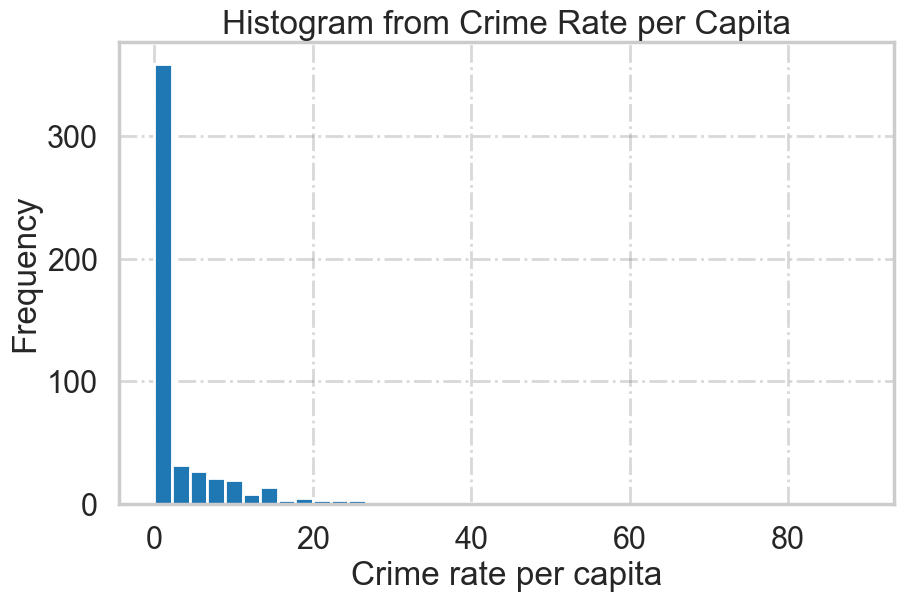

In [1136]:
#your turn
plt.figure(figsize=(10,6))
plt.hist(bos.CRIM, bins=40)
plt.title("Histogram from Crime Rate per Capita")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.grid(b=True, color='grey', alpha=0.3, linestyle='-.', linewidth=2)
plt.show()

Answer:

The log-transformation is widely used to deal with skewed data. In the case of crime rate, the distribution is clearly skewed since the histogram has most of the observations close to zero and a long tail. Looking at the descriptive statistics for the variable, the minimum value is 0.0006 and the maximum value if 88.9762, whereas the median is 0.25. The median is distinct from the mean, which is another indication of skweness; the mean is 3.6135. In fact, 75% of the data is below 3.677 which is very close to the mean. 

The histogram with the log transformation allows us to see more clearly the breath of values the variable takes. Also, the scatterplot between log crime rate and prices clearly shows a negative relationship: on average, for dwellings in a high crime area, the average price of the dwellings is lower than those in lower crime areas. The relationship in the scatterplot that did not include the log transformation is not as clear because most data points we clustered around 0 at the x-axis.

<div class="span5 alert alert-info">

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

Note: Here I did scatterplots for potential predictors against each other because the exercises says it's looking for "correlations" in predictors. Also, histograms cannot plot 2 variables "against each other." 

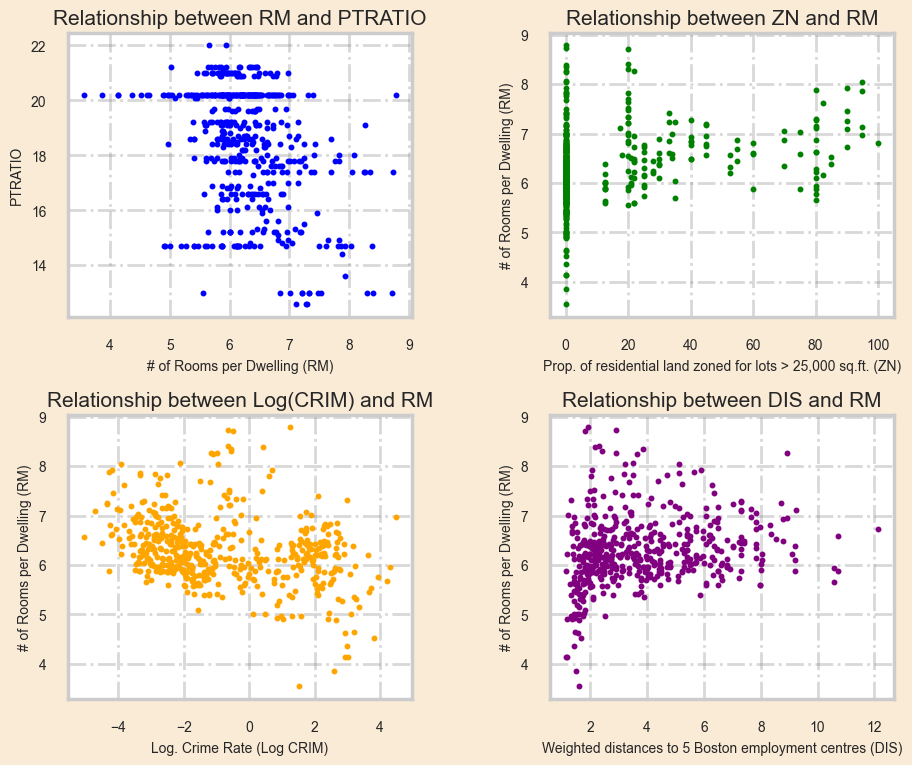

In [1877]:
figure, axis = plt.subplots(2, 2, figsize=(10, 8), facecolor = 'antiquewhite' )
figure.tight_layout() 

# Fig 1
axis[0][0].scatter(bos.PTRATIO, bos.RM,  s=5, color = "blue")
axis[0][0].xaxis.set_tick_params(labelsize=10)
axis[0][0].yaxis.set_tick_params(labelsize=10)
axis[0][0].set_xlabel("Pupil-Teacher ratio", labelpad = 5, fontsize=10)
axis[0][0].set_ylabel("# of Rooms per Dwelling (RM)", labelpad = 5, fontsize=10)
axis[0][0].set_title("Relationship between PTRATIO and RM", fontsize=15)
axis[0][0].grid(b=True, color='grey', alpha=0.3, linestyle='-.', linewidth=2)

# Fig 2 
axis[0][1].scatter(bos.ZN, bos.RM, s=5, color = "green")
axis[0][1].xaxis.set_tick_params(labelsize=10)
axis[0][1].yaxis.set_tick_params(labelsize=10)
axis[0][1].set_xlabel("Prop. of residential land zoned for lots > 25,000 sq.ft. (ZN)", labelpad = 5, fontsize=10)
axis[0][1].set_ylabel("# of Rooms per Dwelling (RM)", labelpad = 5, fontsize=10)
axis[0][1].set_title("Relationship between ZN and RM", fontsize=15)
axis[0][1].grid(b=True, color='grey', alpha=0.3, linestyle='-.', linewidth=2)

# Fig 3 

axis[1][0].scatter(np.log(bos.CRIM), bos.RM, s=5, color = "orange")
axis[1][0].xaxis.set_tick_params(labelsize=10)
axis[1][0].yaxis.set_tick_params(labelsize=10)
axis[1][0].set_xlabel("Log. Crime Rate (Log CRIM)", labelpad = 5, fontsize=10)
axis[1][0].set_ylabel("# of Rooms per Dwelling (RM)", labelpad = 5, fontsize=10)
axis[1][0].set_title("Relationship between Log(CRIM) and RM", fontsize=15)
axis[1][0].grid(b=True, color='grey', alpha=0.3, linestyle='-.', linewidth=2)


# Fig 4

axis[1][1].scatter(bos.DIS, bos.RM, s=5, color = 'purple')
axis[1][1].xaxis.set_tick_params(labelsize=10)
axis[1][1].yaxis.set_tick_params(labelsize=10)
axis[1][1].set_xlabel("Weighted distances to 5 Boston employment centres (DIS)", labelpad = 5, fontsize=10)
axis[1][1].set_ylabel("# of Rooms per Dwelling (RM)", labelpad = 5, fontsize=10)
axis[1][1].set_title("Relationship between DIS and RM", fontsize=15)
axis[1][1].grid(b=True, color='grey', alpha=0.3, linestyle='-.', linewidth=2)


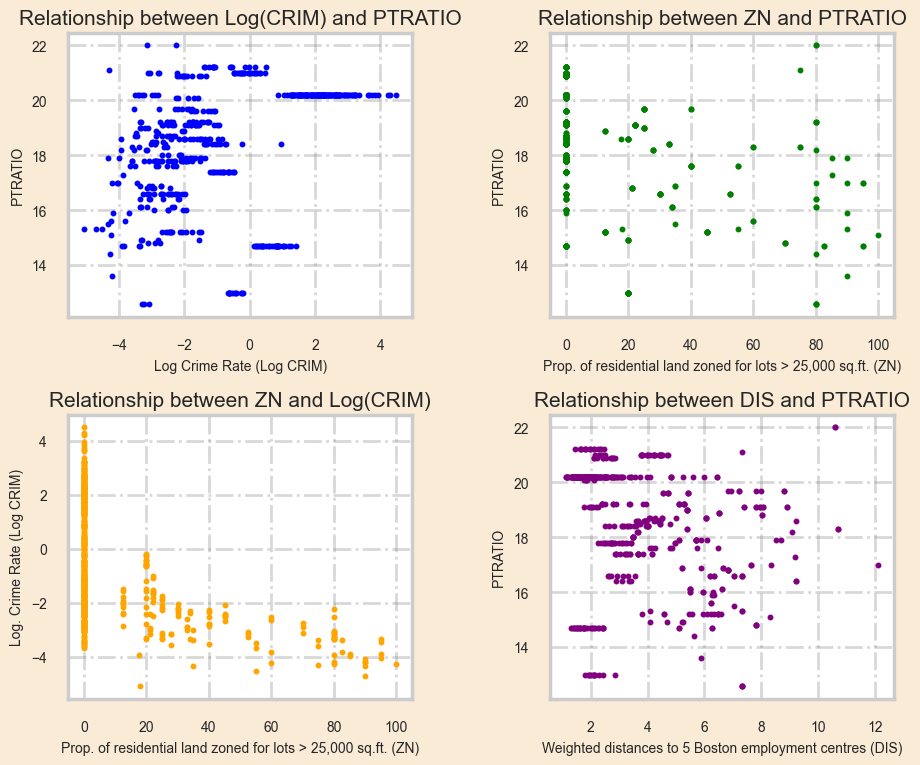

In [1908]:
figure, axis = plt.subplots(2, 2, figsize=(10, 8), facecolor = 'antiquewhite' )
figure.tight_layout() 

# Fig 1
axis[0][0].scatter(np.log(bos.CRIM), bos.PTRATIO,  s=5, color = "teal")
axis[0][0].xaxis.set_tick_params(labelsize=10)
axis[0][0].yaxis.set_tick_params(labelsize=10)
axis[0][0].set_ylabel("Pupil-Teacher ratio", labelpad = 5, fontsize=10)
axis[0][0].set_xlabel("Log Crime Rate (Log CRIM)", labelpad = 5, fontsize=10)
axis[0][0].set_title("Relationship between Log(CRIM) and PTRATIO", fontsize=15)
axis[0][0].grid(b=True, color='grey', alpha=0.3, linestyle='-.', linewidth=2)

# Fig 2 
axis[0][1].scatter(bos.ZN, bos.PTRATIO, s=5, color = "maroon")
axis[0][1].xaxis.set_tick_params(labelsize=10)
axis[0][1].yaxis.set_tick_params(labelsize=10)
axis[0][1].set_xlabel("Prop. of residential land zoned for lots > 25,000 sq.ft. (ZN)", labelpad = 5, fontsize=10)
axis[0][1].set_ylabel("Pupil-Teacher ratio", labelpad = 5, fontsize=10)
axis[0][1].set_title("Relationship between ZN and PTRATIO", fontsize=15)
axis[0][1].grid(b=True, color='grey', alpha=0.3, linestyle='-.', linewidth=2)

# Fig 3 

axis[1][0].scatter(bos.ZN, np.log(bos.CRIM), s=5, color = "magenta")
axis[1][0].xaxis.set_tick_params(labelsize=10)
axis[1][0].yaxis.set_tick_params(labelsize=10)
axis[1][0].set_xlabel("Prop. of residential land zoned for lots > 25,000 sq.ft. (ZN)", labelpad = 5, fontsize=10)
axis[1][0].set_ylabel("Log. Crime Rate (Log CRIM)", labelpad = 5, fontsize=10)
axis[1][0].set_title("Relationship between ZN and Log(CRIM)", fontsize=15)
axis[1][0].grid(b=True, color='grey', alpha=0.3, linestyle='-.', linewidth=2)


# Fig 4

axis[1][1].scatter(bos.DIS, bos.PTRATIO, s=5, color = 'navy')
axis[1][1].xaxis.set_tick_params(labelsize=10)
axis[1][1].yaxis.set_tick_params(labelsize=10)
axis[1][1].set_xlabel("Weighted distances to 5 Boston employment centres (DIS)", labelpad = 5, fontsize=10)
axis[1][1].set_ylabel("Pupil-Teacher ratio", labelpad = 5, fontsize=10)
axis[1][1].set_title("Relationship between DIS and PTRATIO", fontsize=15)
axis[1][1].grid(b=True, color='grey', alpha=0.3, linestyle='-.', linewidth=2)

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [ ]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 23 May 2023   Prob (F-statistic):           2.49e-74
Time:                        16:00:23   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

Remember that for price, each value corresponds to the average house value in units of 100,000.

In the figure below, we plot the observed price in the x-axis and the predicted price in the y-axis. The line represents a 1-to-1 relationship between the observed and predicted price; thus, points above the line overestimate the price (because the predicted price is higher than the observed price), while points below the line underestimate the price (because the predicted price is lower than the observed price). 

We observe that for dwellings with an observed price below 20, the predicted price tends to be overestimated. Clearly a lot of the predictions are above the red line. On the other hand, for dwellings with an observed price on the highest spectrum, above 30, the predicted price is consistenly underestimated as all of the predictions are below the red line.

The model does a better job at predicting price for those dwellings with prices between 20 and 30 because the predictions are around the red line. So the model can predict the price for those dwellings with an average price pretty well. 

In a nutshell, the model overpredicts price for dwellings that are cheaper and underpredicts price for dwellings that are more expensive. 

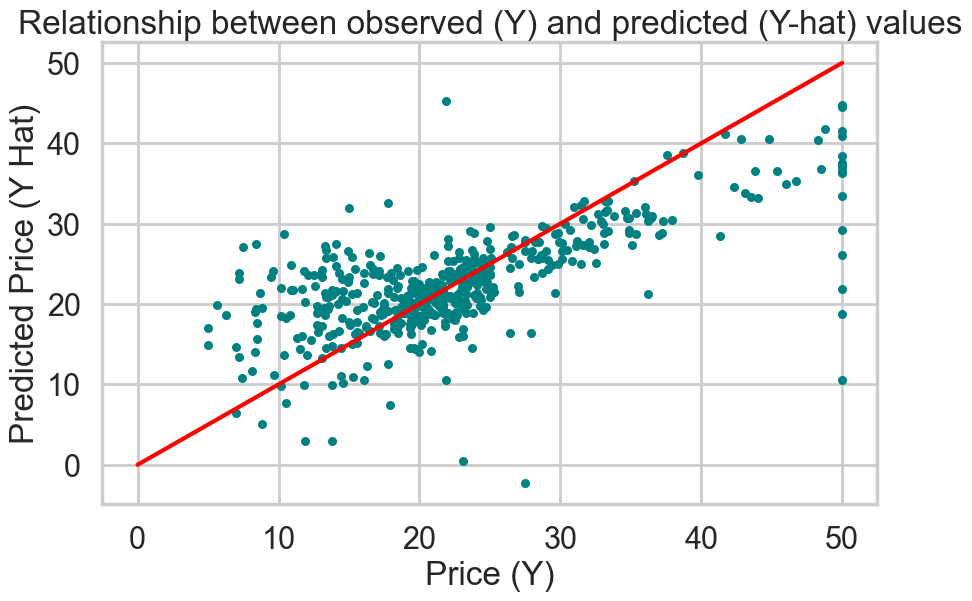

In [ ]:
# your turn
plt.figure(figsize=(10,6))
plt.scatter(bos.PRICE, m.fittedvalues, s = 20, color = 'teal')
plt.xlabel("Price (Y)")
plt.ylabel("Predicted Price (Y Hat)")
plt.title("Relationship between observed (Y) and predicted (Y-hat) values")
plt.plot([0,50],[0,50], color = 'red' )

### Fitting Linear Regression using `sklearn`


In [ ]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression()

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [ ]:
# Look inside lm object
#lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [ ]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression()

In [ ]:
lm.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

</div>

Answer:
Below I fit a model without intercept. 

In a *model with an intercept*, the predicted Y is equal to:

$$\hat{Y} = \hat{\alpha} + \hat{\beta}X$$

If $X$ has a true zero, that means than when $x = 0$, $\hat{y} = \hat{\alpha}$.

On the other hand, in a *model without an intercept*, the predicted Y is equal to:

$$\hat{Y} =  \hat{\beta}X$$

One potential problem here is that if $x=0$, then $\hat{y} = \hat{\beta} * 0 = 0$ which is a very strong assumption. Moreover, if this is not the case, not only the predictions will be wrong, but so will the model sum of squares and the residual sum of squares; in turn, the R squared and the F-Statistics will be wrong. In fact, because the model ad residual sum of squares will be inflated, we will think the model is doing better when it actually is doing worse. 

In [ ]:
# linear regression without intercept/alpha
lm_noalpha = LinearRegression(fit_intercept=False)
lm_noalpha.fit(X, bos.PRICE)

LinearRegression(fit_intercept=False)

In [ ]:
lm_noalpha.intercept_

0.0

In [ ]:
lm_noalpha.coef_

<div class="span5 alert alert-info">

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

</div>

Answer:

The assumption is that errors (not residuals like the prompt says) have to be independent and identically distributed. The assumption can be divided in two parts. 

First, an assumption that the error is homoskedastic, that is that is has constant variance. This violated when the error is correlated with a covariate and the variance of the error changes for some values of the covariate. Heteroskedasticity can be assessed by plotting each covariate against the residuals; if there is a specific pattern, such as higher dispersion for lower or higher values of the covariate, then we might be have a problem of unequal variance. In such a case, heteroskedasticity could be caused by a missing covariate that should be included in the regression. 

The second part of the assumption refers to no autocorrelation of the errors. Autocorrelation is common in time serial data or in spatial data because data that is close temporally or geographically might have similar errors. Autocorrelation can be visualized on a data plot when a given observation is more likely to lie above a fitted line if adjacent observations also lie above the fitted regression line. A common diagnostic involves plotting fitted values against residuals and observing patterns. There are also diagnostics specific to time serial data.

If the assumption of i.i.d errors is not met, the model estimates will be unbiased but inefficient.

To assess if the model assumptions are plausible, we look at the residuals because the residuals are the estimates of the error term. To answer the question in short, it is not enough to assess whether the residuals are normally distributed, such as looking at a QQ-Plot, because it is only one side of the problem and it is also not enough to know what the root of the problem is from a QQ-Plot. 

<div class="span5 alert alert-info">
<p><b>Exercise:</b> True or false. To use linear regression, Y must be normally distributed. Explain your answer.</p>

<div>

Answer: This is false. There is no assumption about the distribution of Y, only about the distribution of the errors. Y only needs to be continuous.

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `lm.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [ ]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.45948838508987


In [ ]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [ ]:
# The coefficients
pd.DataFrame({'features': X.columns, 'Estimated Coefficients': lm.coef_})[['features', 'Estimated Coefficients']]

,features,Estimated Coefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [ ]:
def get_conf_int(alpha, lm, X, y):
    
    """
    Returns (1-alpha) 2-sided confidence intervals
    for sklearn.LinearRegression coefficients
    as a pandas DataFrame
    """
    
    coefs = np.r_[[lm.intercept_], lm.coef_]
    X_aux = X.copy()
    X_aux.insert(0, 'constant', 1)
    dof = -np.diff(X_aux.shape)[0]
    mse = np.sum((y - lm.predict(X)) ** 2) / dof
    var_params = np.diag(np.linalg.inv(X_aux.T.dot(X_aux)))
    t_val = stats.t.isf(alpha/2, dof)
    gap = t_val * np.sqrt(mse * var_params)

    return pd.DataFrame({
        'lower': coefs - gap, 'upper': coefs + gap
    }, index=X_aux.columns)


# for 95% confidence interval; use 0.01 for 99%-CI.
alpha = 0.05
# fit a sklearn LinearRegression model

print('95% Confidence Interval for Coefficients')
get_conf_int(alpha, lm=lm , X = X, y = bos.PRICE)

95% Confidence Interval for Coefficients


,lower,upper
constant,26.432226,46.486751
CRIM,-0.172584,-0.043438
ZN,0.019449,0.073392
INDUS,-0.100268,0.141385
CHAS,0.993904,4.379563
NOX,-25.271634,-10.261589
RM,2.988727,4.631004
AGE,-0.025262,0.026647
DIS,-1.867455,-1.083679
RAD,0.175692,0.436407


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [ ]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

Answer #1: 

Below we see the histogram of predicted prices. We observe that one prediction is below zero and it is highlighted in red. Prices cannot be negative, so this prediction is problematic. 

The center of the distribution of predictions is centered around the mean observed value of prices. However, the highest predicted prices are lower than the highest observed prices. 

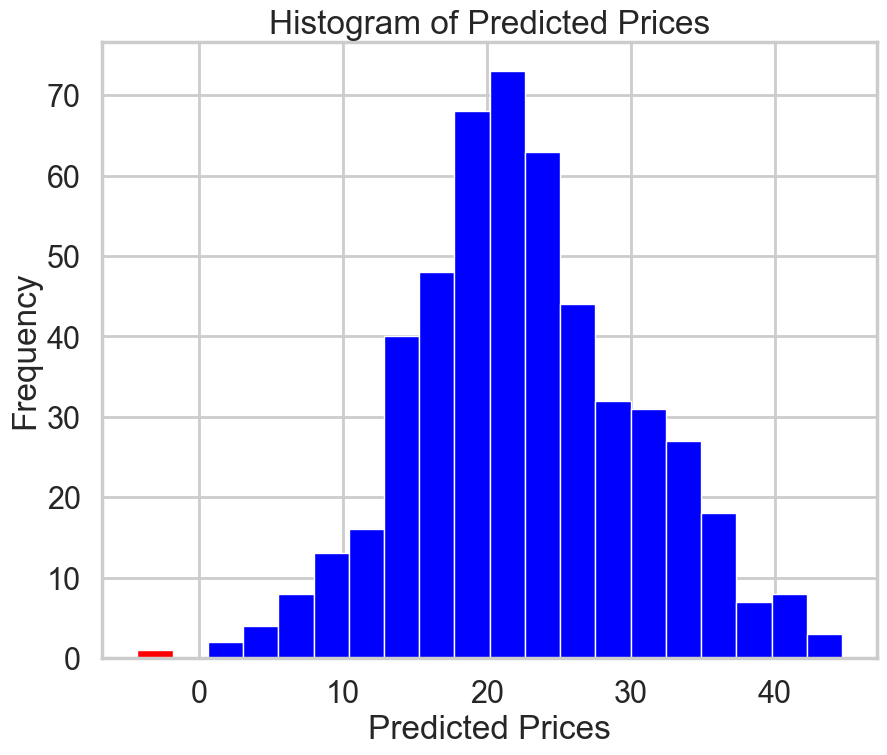

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
N, bins, patches = ax.hist(lm.predict(X), bins=20, edgecolor='white', linewidth=1)

for i in range(0,1):
    patches[i].set_facecolor('red')
for i in range(1,len(patches)):    
    patches[i].set_facecolor('blue')

plt.title("Histogram of Predicted Prices")
plt.xlabel("Predicted Prices")
plt.ylabel("Frequency")
plt.show()

Answer #2:

Like in the previous figure of observed prices against predicted prices, the model underpredicts the price for the dwellings with the highest observed prices. However, this model improves considerable the predicted prices for those dwellings that are cheaper (the previous model overpredicted the price considerably).

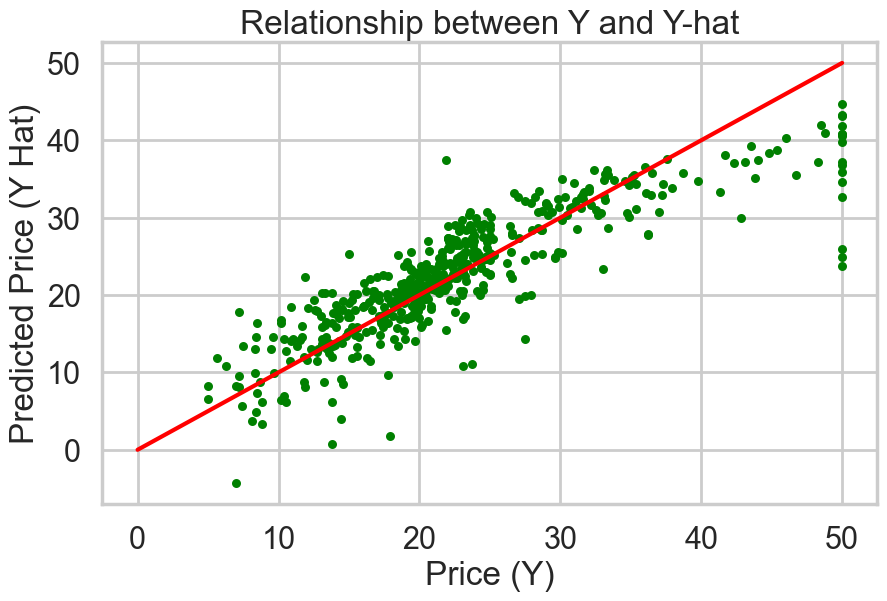

In [ ]:
# scatterplot of predicted prices versus observed prices
plt.figure(figsize=(10,6))
plt.scatter(bos.PRICE, lm.predict(X), s = 20, color = 'green')
plt.xlabel("Price (Y)")
plt.ylabel("Predicted Price (Y Hat)")
plt.title("Relationship between Y and Y-hat")
plt.plot([0,50],[0,50], color = 'red' )


Answer #3: 
Both libraries fit the same linear regression; the difference is that statsmodel has functions to provide an output with coefficients and number of fit statistics/measures, whereas in sckit-learn it's necessary to write functions to calculate many of those. 

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [ ]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11078.784577954979


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [ ]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE))**2))

31637.510837064685


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSR = \frac{ESS}{K}$$

$$MSE = \frac{RSS}{N-K-1}$$

**Remember:** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \hspace{.05in} \text{for all $i$} \\
H_A: \beta_i > 0, \hspace{.05in} \text{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.



<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [ ]:
# Regression with x = PTRATIO
X_PTRATIO = X[["PTRATIO"]]
lm_2 = LinearRegression()
lm_2.fit(X_PTRATIO, bos.PRICE)

LinearRegression()

In [ ]:
lm_2.coef_

array([-2.1571753])

In [ ]:
# R-SQUARED 
RSS = np.sum((bos.PRICE - lm_2.predict(X_PTRATIO))**2)
ESS = np.sum((lm_2.predict(X_PTRATIO) - np.mean(bos.PRICE))**2)
TSS = RSS + ESS
R2 = ESS/TSS

In [ ]:
# F-Statistic
MSE = RSS/(len(bos.PTRATIO) - len(X_PTRATIO.columns) - 1)
MSR = ESS/len(X_PTRATIO.columns)
F_Stat = MSR/MSE

In [ ]:
print('Estimated intercept coefficient: {}'.format(round(lm_2.intercept_,3)))
print('Estimated coefficient for PTRATIO: {}'.format(lm_2.coef_, 3))
print("R2: " + str(round(R2, 3)))
print("F-Statistic: " + str(round(F_Stat, 3)))

Estimated intercept coefficient: 62.345
Estimated coefficient for PTRATIO: [-2.1571753]
R2: 0.258
F-Statistic: 175.106


**Answer:**
The coefficient for PTRATIO is -2.15 meaning that a one unit increase in the pupil-teacher ratio decreases the price of dwellings by 2.157 (which translated to 2,157 dollars, on average). 

R-squared is not a measure to assess model fit or validity. I disagree with the information provided above that R-squared says something about the model quality. R-squared could also be interpreted as how much variance of Y is captured by the model, but that is not really useful information in a vacuum -- how much variance can we explain or would want to explain?  Plus, the more variables you add, the higher it is. In this particular case, someone could say that 25.8% of the variance is being explained by the model. 

The F-statistic has the null hypothesis that every coefficient is equal zero. In this case, we reject the null hypothesis.  Because here we only have one variable, the F-Statistic is equivalent to the t-test in which we test whether the coefficient for PTRATIO is different from zero. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [ ]:
# regression w/3 variables
X_three = X_PTRATIO = X[["RM", "CRIM", "PTRATIO"]]
lm_3 = LinearRegression()
lm_3.fit(X_three, bos.PRICE)

LinearRegression()

In [ ]:
# R-squared
RSS = np.sum((bos.PRICE - lm_3.predict(X_three))**2)
ESS = np.sum((lm_3.predict(X_three) - np.mean(bos.PRICE))**2)
TSS = RSS + ESS
R2 = ESS/TSS

# F-Statistics
MSE = RSS/(len(bos.PTRATIO) - len(X_three.columns) - 1)
MSR = ESS/len(X_three.columns)
F_Stat = MSR/MSE

# Variance, t-value, p-value for coefficients
params = np.append(lm_3.intercept_,lm_3.coef_)
predictions = lm_3.predict(X_three)

newX = pd.DataFrame({"Constant":np.ones(len(X_three))}).join(pd.DataFrame(X_three))

lm_params = pd.DataFrame({"Constant":np.ones(len(X_three))}).join(pd.DataFrame(X_three))

# variance-covariance matrix, diagnonal for variance
VAR_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())

# standard deviation
SD_b = np.sqrt(VAR_b)

# t-value for coefficients
ts_b = params/ SD_b

# p-value for coefficients
p_values = [2 * (1 - stats.t.cdf(np.abs(i), (len(newX) - len(newX.columns)))) for i in ts_b]


SD_b = np.round(SD_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

# Output
myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [params,SD_b,ts_b,p_values]
print(myDF3)

# Output
print(pd.DataFrame({'features': X_three.columns, 'Estimated Coefficients': lm_3.coef_})[['features', 'Estimated Coefficients']])
print('Estimated intercept: {}'.format(round(lm_3.intercept_,3)))
print("R2: " + str(round(R2, 3)))
print("F-Statistic: " + str(round(F_Stat, 3)))

   Coefficients  Standard Errors  t values  Probabilities
0       -3.3707            4.034    -0.836          0.404
1        7.3804            0.402    18.382          0.000
2       -0.2050            0.032    -6.399          0.000
3       -1.0695            0.133    -8.051          0.000
  features  Estimated Coefficients
0       RM                7.380411
1     CRIM               -0.204961
2  PTRATIO               -1.069546
Estimated intercept: -3.371
R2: 0.594
F-Statistic: 245.164


In [ ]:
print('95% Confidence Interval for Coefficients')
get_conf_int(alpha, lm=lm_3 , X = X_three, y = bos.PRICE)

95% Confidence Interval for Coefficients


,lower,upper
constant,-11.295947,4.554539
RM,6.591569,8.169253
CRIM,-0.267891,-0.142030
PTRATIO,-1.330542,-0.808551


In [ ]:
lm_4 = ols('PRICE ~ CRIM + RM + PTRATIO',bos).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Tue, 23 May 2023   Prob (F-statistic):           6.15e-98
Time:                        18:27:55   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.4

**Answer:**

The F-Statistic is 245.2 and the p-value is below alpha = 0.05, so we can reject the null stating that the coefficient for the three covariates are equal to zero.

The R-squared is 0.59. 

There are three covariates in this model: number of rooms per dwelling, crime rate, and pupil-teacher ratio. 

Number of rooms is positively related, on average, with price. An increase of one room increases price by 7.380 (or $7,380). The 95% confidence interval for the estimate is [6.591569,	8.169253] and does not include zero, meaning the coefficient is distinct from zero. 

An increase in crime rate has, on average, a negative effect on the price of dwellings. A one unit increase in the crime rate decreases price by 0.205 (or $205). The coefficient has a 95% confidence interval of [-0.267891,	-0.142030] and zero is not included in the CI.  

The pupil-teacher ratio is negatively related to price. An increase of one student more per teacher decreases dwelling price by 1.069 (or 1,069 dollars). The 95% CI is [-1.330542,	-0.808551] and does not include zero.

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [ ]:
lm_5 = ols('PRICE ~ CRIM + RM + PTRATIO + ZN',bos).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     185.6
Date:                Tue, 23 May 2023   Prob (F-statistic):           1.86e-97
Time:                        18:27:55   Log-Likelihood:                -1610.2
No. Observations:                 506   AIC:                             3230.
Df Residuals:                     501   BIC:                             3252.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.1416      4.045     -1.024      0.3

In [ ]:
# F-Statistic for Model Comparison
X_4 = X[['PTRATIO','RM','CRIM']]
X_5 = X[['PTRATIO','RM','CRIM','ZN']]
RSS_lm_4 = np.sum((bos.PRICE - lm_4.predict(X_4))**2)
RSS_lm_5 = np.sum((bos.PRICE - lm_5.predict(X_5))**2)
DF_4 = len(X_4) - len(X_4.columns) - 1
DF_5 = len(X_5) - len(X_5.columns) - 1

F_model_comp = ((RSS_lm_4 - RSS_lm_5)/(DF_4-DF_5)/(RSS_lm_5/DF_5))
print("F Statistic for model comparison is: " + str(F_model_comp))

F Statistic for model comparison is: 3.4726280318229774


**Answer #1:** Above I calculated the F-Statistic for model comparison. To calculate the p-value associated with the F critical value, we look at the CDF of the F distribution with the following degrees of freeding: DF of the smaller model - DF of the bigger model, and DF of the bigger model. Below, we observe that the p-value os 0.06, meaning that fail to reject the null hypothesis that the bigger model is better than smaller model.

In [ ]:
from scipy.stats import f
f.sf(F_model_comp, (DF_4-DF_5), DF_5)


0.06297694100937037

**Answer #2:**

The AIC for the model with three variables is 3232. The AIC for the model with four variables is 3230. Using the following equation  for the relative likelihood:

$$exp((3230-3232)/2) = 0.36$$

we estimate that the second model is 0.36 times as probable as the first model to minimize the information loss. Is this worth the extra parameter?

Looking at the BIC, which is based on the AIC but penalizes for the additon on parameters, makes the decision in favor of model 1 clearer, because the BIC for model 2 is bigger (3252) than for model 1 (3249).


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>Linearity. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>Constant standard deviation. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> Normal distribution for errors.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> Independent errors.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>Correlated Predictors: Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>Influential Points: Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

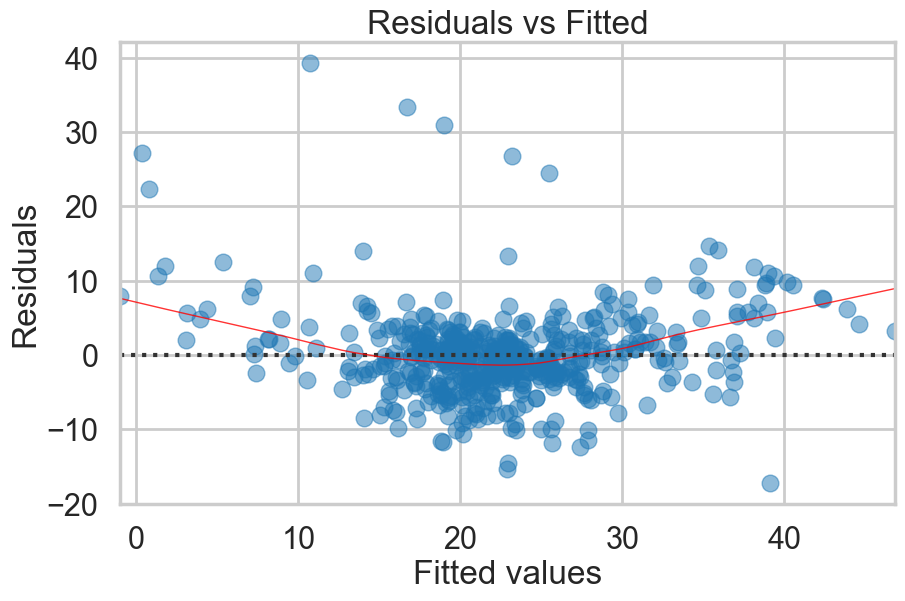

In [2083]:
# fitted values v residuals
model_fitted_y = lm_4.fittedvalues
plot = sns.residplot(x=model_fitted_y, y='PRICE', data=bos, lowess=True, 
                     scatter_kws={'alpha': 0.5}, 
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted values')
plot.set_ylabel('Residuals')

**Figure of fitted values against residuals:** We see a similar pattern to the fitted values against the predicted values. The residuals are equal to $Y - \hat{Y}$ which means that a positive residual indicates that our predicted value is lower than the observed value (under predicting) while a negative residual indicates that the predicted value is larger than the observed value (over predicting).

For cases in which the price is low (fitted values below 10), the residuals are mostly positive, meaning that the model is, on average, predicting lower prices for low price dwellings. For cases in which the price is high (over 38 or so), the residuals are also positive, meaning that the model is underpredicting the prices for dwellings on the highest price bracket. 

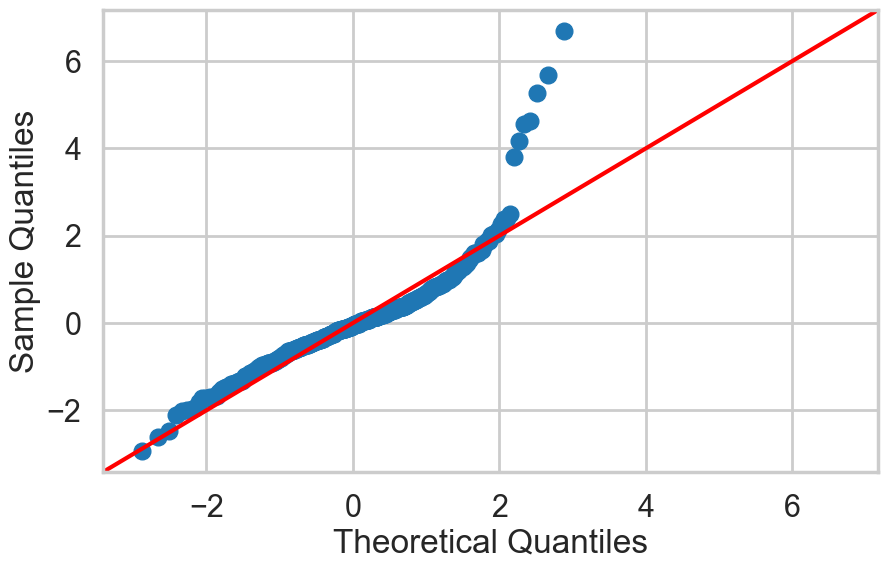

In [2126]:
# QQ plot
sm.qqplot(lm_4.resid_pearson, line ='45')
fig.tight_layout(pad=1.0)

**QQ-Plot:** This plot shows how two distributions' quantiles line up. On the x-axis we have our theoretical quantiles for the standard normal distribution, while on the y-axis we have model's standardized residuals (also called Pearson's residuals). We observe that, for the most part, both follow the same shape, but on the far right, the stardardized residuals are higher than the the theoretical quantiles. In other words, we would expect the residuals to be lower than they are. Higher residuals than expected means that we would have expected to predict a higher price and, instead, we predicted a far too low price. This is consistent with our findings in the previous plot of fitted values against residuals.

**Component & Component Plus Residual Plot:** The three figures below show component residual plots for each covariate. We see that for each covariate, for about 5-7 data points, the residuals are much higher than expected. These data points are further from the predicted line, meaning that the observed value is much larger than the prediction; we are under predicting the price. Specifically, for the CRIM plot, there are 7 data points for which the residual is very high when CRIM is low; for the PTRATIO plot, 7 data points have a much larger residual when PTRATIO is 20; for the final RM plot, the residual is much higher for 6 data points for which RM is around average, between 6 and 7 rooms. 



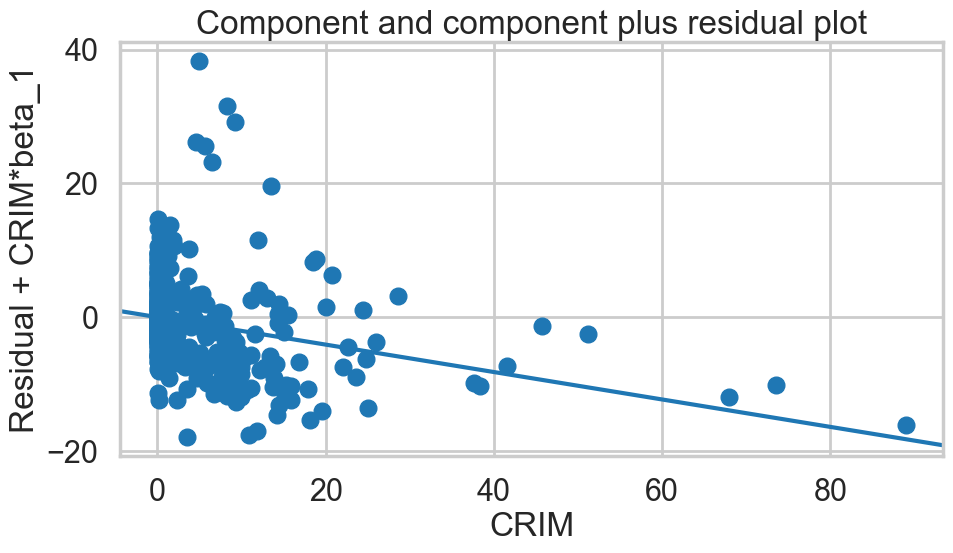

In [2127]:
# residuals v covariates - CRIM
fig = sm.graphics.plot_ccpr(lm_4, "CRIM")
fig.tight_layout(pad=1.0)

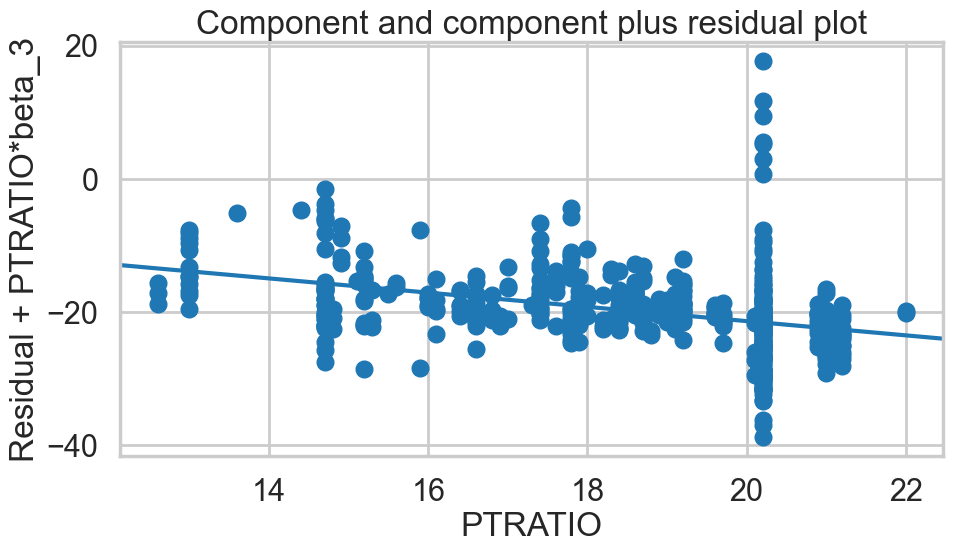

In [2128]:
# residuals v covariates - PTRATIO
fig = sm.graphics.plot_ccpr(lm_4, "PTRATIO")
fig.tight_layout(pad=1.0)

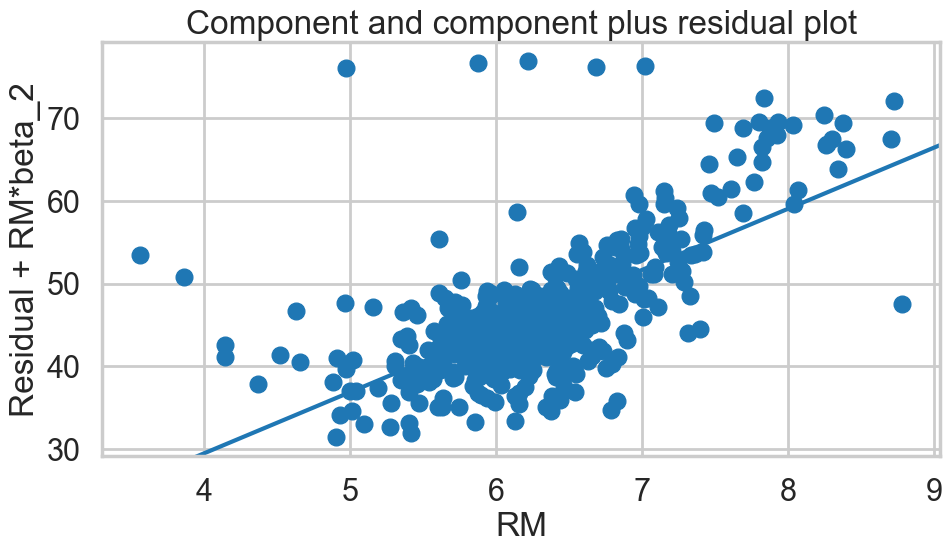

In [2129]:
# residuals v covariates - RM
fig = sm.graphics.plot_ccpr(lm_4, "RM")
fig.tight_layout(pad=1.0)

**Partial Regression Plots:** The figure below presents four partial regression plots for the three estimates in our model (coefficients for the three covariates & the intercept). The partial regression plot shows the relationship between the response and the given explanatory variable after removing the effect of all other explanatory variables (in practice, this is achieved by taking partial derivative with respect to the covariate). 

We can see that there are 5 observations in the first panel (intercept), the RM panel, the CRIM panel, and the PTRATIO panel that are far north from the predicted line and all close to each other. These observations have an average number of rooms, higher PTRATIO, lower CRIM, while the observed price is higher than the predicted price. Again, this is a case in which our model is underestimating the price for the dwelling. This is the same story from other figures.

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


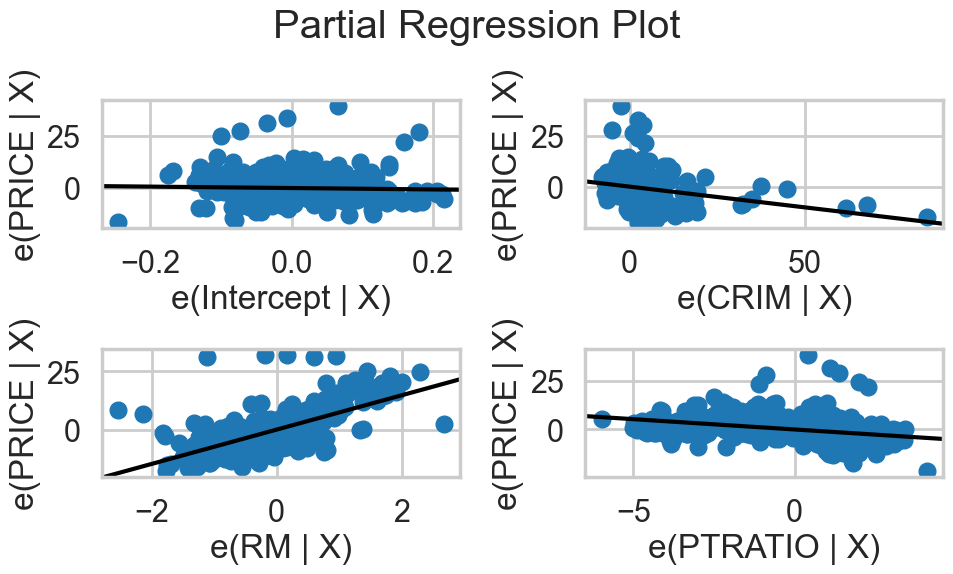

In [2130]:
# partial regression plots
plt.rc("figure", figsize=(10,6))
fig = sm.graphics.plot_partregress_grid(lm_4 )
fig.tight_layout(pad=1.0)

**Influence and Leverage Plots:** Below I present plots to indentify influential and high leverage observations. 

An outlier is a point that has a large residual, while a high leverage point is a point that has an extreme value for an x predictor. 

Influential points are those that can affect the slope of the regression. To estimate that, we can calculate and plot Cook's distance. Cook's distance directly summarizes how much all of the fitted values change when the ith observation is deleted. A data point having a large Cook's distance indicates that the data point strongly influences the fitted values. We see below that Cook's distance is considerably high for a number of observations 364, 365, 367, and 368. 

Taking a closer look at the observations, we see that three of them (365, 367, 368), have a criminal rate in the highest 25% group. The four observations have a PTRATIO of 20 which, interestingly, is the same value of those observations with large residuals we identified in the partial residual plots. Three of the observations have a number of rooms in the middle of the variable's distribution and one observation has an average number of rooms over 8. 

Looking at the observed price, one observation stands out: 368. This is an odd observation, because the price is among the highest prices (50), but it also has a criminal rate above the average and in the top 25% (4.89), it has a number of rooms (4.9) below the average (RM mean = 6.28), and the PTRATIO (20) is higher than the average (18.2). This observation is odd because it is a very expensive house with less rooms than other houses, with a worse pupil-teacher ratio, and a worse criminal rate, so it begs the question as to why this house is so expensive. Moreover, the predicted price is 10.7 which is far from the observed price of 50. 

Focusing on the observations 365 and 367, they also have a criminal rate in the top 25%, they also have a number of rooms below the mean, and a high pupil-teacher ratio. These observations have a price closer to the average price (22), so not as high as observation 368. However, the predicted price is far from the observed price. Observation 365 has an observed price of 27.5 and a prediction of 0.37. Observation 367 has an observed price of 23.1 and a prediction of 0.76. 

The last observation is a different story. Here we have an observed price close to the average, an extremely high number of rooms (8.7), an average criminal rate (3.47), and a high PTRATIO. The model predicts the price to be 39.1, which is nearly double of the observed price. The high price is possibly driven by the extremly high number of rooms. 

Moving the high-leverage plot, we see that observations 380, 405, and 415, have a high leverage (on the y-axis), meaning that they have an extreme value for a covariate. Looking at the rows of the dataset, we see that they have a particularly high value for CRIM. For observation 380, CRIM = 88.9; for observation 405, CRIM = 67.9; for observation 415, CRIM = 18.08. The average CRIM is 3.61, while 75% of the observations have a CRIM lower than 3.67. These are clearly leverage points. Looking at the predicted price, though, the predictions are not far from the observed price expect for observation 415 (observed price is 7 and the prediction is close to double, 18).The conclusion here is that more work should be done to understand the price of dwellings in areas where the criminal rate is extremely high in comparison to the other areas. 



<AxesSubplot:title={'center':"Cook's Distance Outlier Detection"}, xlabel='instance', ylabel='distance'>

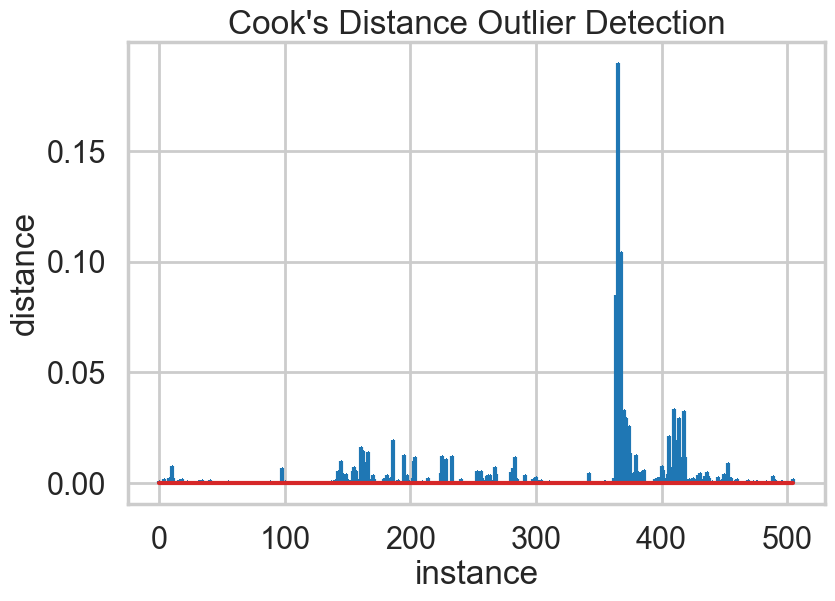

In [2252]:
# Cook's distance
from statsmodels.stats.outliers_influence import OLSInfluence as influence
inf = influence(lm_4)
C, P = inf.cooks_distance
def plot_cooks_distance(c):
    _, ax = plt.subplots(figsize=(9,6))
    ax.stem(c, markerfmt=",")
    ax.set_xlabel("instance")
    ax.set_ylabel("distance")
    ax.set_title("Cook's Distance Outlier Detection")
    return ax


plot_cooks_distance(C)

In [2253]:
C[C > 0.05]

364    0.085110
365    0.189738
367    0.100813
368    0.104185
dtype: float64

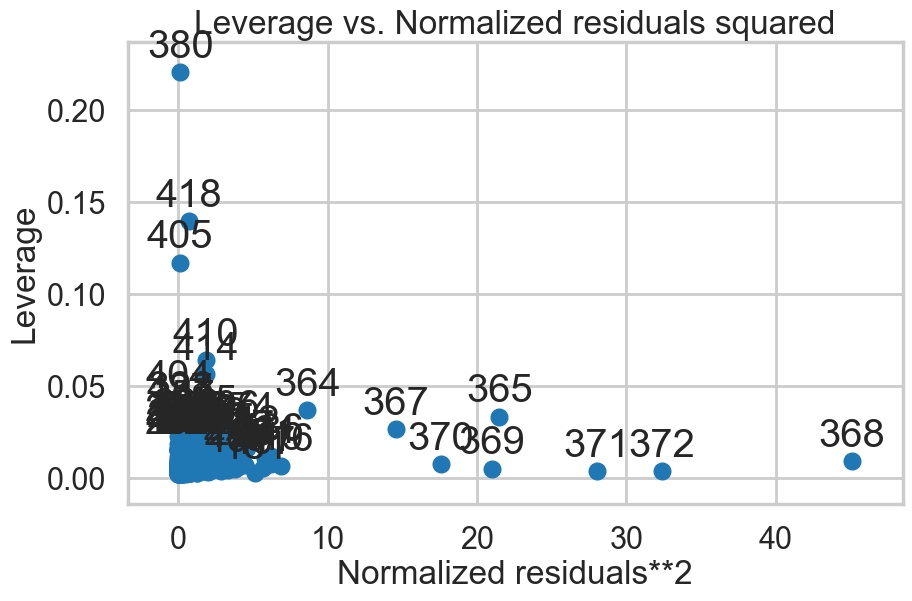

In [2254]:
# leverage plot
sm.graphics.plot_leverage_resid2(lm_4)
fig.tight_layout(pad=1.0)

In [2255]:
# high leverage observations
bos.loc[[380, 405, 415], ['PRICE','CRIM', 'RM', 'PTRATIO']]

,PRICE,CRIM,RM,PTRATIO
380,10.4,88.9762,6.968,20.2
405,5.0,67.9208,5.683,20.2
415,7.2,18.0846,6.434,20.2


In [2256]:
# predicted values for high leverage observations
x_infl = bos.loc[[380, 405, 415], ['PRICE','CRIM', 'RM', 'PTRATIO']]
lm_4.predict(x_infl)

380     8.214533
405     3.046237
415    18.803395
dtype: float64

In [2257]:
# influential observations
bos.loc[[364, 365, 367, 368], ['PRICE','CRIM', 'RM', 'PTRATIO']]

,PRICE,CRIM,RM,PTRATIO
364,21.9,3.47428,8.780,20.2
365,27.5,4.55587,3.561,20.2
367,23.1,13.52220,3.863,20.2
368,50.0,4.89822,4.970,20.2


In [2258]:
# predicted values for the influential observations
x_leverage = bos.loc[[364, 365, 367, 368], ['PRICE','CRIM', 'RM', 'PTRATIO']]
lm_4.predict(x_leverage)

364    39.112383
365     0.372333
367     0.763471
368    10.701164
dtype: float64

**Influence of influential observations of model coefficients:** Below I drop the influential observations. Comparing the model results to the model with all of the data, we see a considerable change for the estimate of the intercept and for the coefficient for RM. The coefficients for CRIM and PTRATIO remain almost unchanged. Above, we have identified that these observations had a very small number of rooms or a very high number of rooms relatively to the observed price. More work should be done to understand why those dwellings we so expensive or cheap considering they were too small or too large. I believe that one problem is that the data is aggregated so the measures are all averages. 

In [2259]:
# dropping ONE influential observation (dropping 3 of them makes no difference either)
lm_6 = ols('PRICE ~ CRIM + RM + PTRATIO', bos.drop([368, 364, 365, 367])).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     330.7
Date:                Wed, 24 May 2023   Prob (F-statistic):          4.35e-118
Time:                        13:39:03   Log-Likelihood:                -1547.9
No. Observations:                 502   AIC:                             3104.
Df Residuals:                     498   BIC:                             3121.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.3491      3.756     -3.022      0.0

In [2260]:
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Wed, 24 May 2023   Prob (F-statistic):           6.15e-98
Time:                        13:39:03   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.4